In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler 

In [3]:
#Importing the income dataset

df = pd.read_csv ("census-income.data.csv", index_col = None)

#Previewing the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [4]:
#Selecting features and splitting the datasets into features and label
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

x = df[selected_features] #feature
y = df.income #label

#Balancing the data
ros = RandomOverSampler()
ros.fit(x, y)

X, Y = ros.fit_resample(x, y)

In [5]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=7)

In [6]:
#Logistic Regression
#Source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python?irclickid=XPG32xUYdxyPWbHWdp29132wUkFSTqSZwQmx3c0&irgwc=1&im_rewards=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow

#setting a seed
model1 = LogisticRegression(max_iter=1000,random_state=7)

#fitting the model using our data
model1.fit(x_train, y_train)

#predicting on the test data.
y_pred = model1.predict(x_test)

In [7]:
print(y_pred)

[1 0 1 ... 0 1 0]


In [8]:
#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

array([[4496, 1658],
       [1455, 4751]], dtype=int64)

In [9]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test, y_pred, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.76      0.73      0.74      6154
        >50k       0.74      0.77      0.75      6206

    accuracy                           0.75     12360
   macro avg       0.75      0.75      0.75     12360
weighted avg       0.75      0.75      0.75     12360



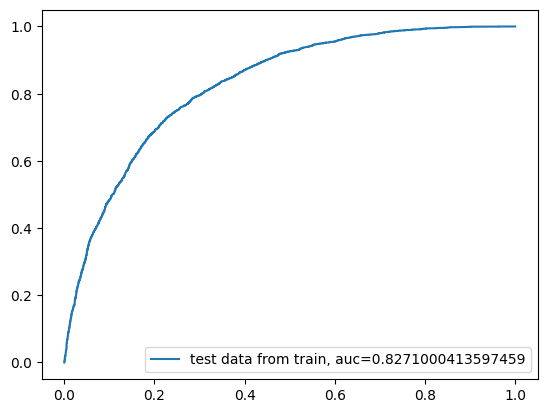

In [10]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr, tpr, label = "test data from train, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [11]:
#now checking from the test data
test = pd.read_csv ("census-income.test.csv", index_col = None)
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [12]:
len(test)

15060

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             15060 non-null  int64
 1   workclass       15060 non-null  int64
 2   fnlwgt          15060 non-null  int64
 3   education       15060 non-null  int64
 4   education-num   15060 non-null  int64
 5   marital-status  15060 non-null  int64
 6   occupation      15060 non-null  int64
 7   relationship    15060 non-null  int64
 8   race            15060 non-null  int64
 9   sex             15060 non-null  int64
 10  capital-gain    15060 non-null  int64
 11  capital-loss    15060 non-null  int64
 12  hours-per-week  15060 non-null  int64
 13  native-country  15060 non-null  int64
 14  income          15060 non-null  int64
dtypes: int64(15)
memory usage: 1.7 MB


In [14]:
selected_features = ['age', 'workclass', 'education-num','marital-status', 'occupation','relationship', 'race', 'sex', "hours-per-week", "native-country"]

#from the real test data
x_test_real = test[selected_features]
y_test_real = test.income

y_pred_real = model1.predict(x_test_real)


#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test_real, y_pred_real)
confusion_mat

array([[7819, 3541],
       [ 779, 2921]], dtype=int64)

In [15]:
#Exporting Logistic Regression Prediction results to csv
#Exporting prediction results to csv
prediction = pd.DataFrame(y_pred_real, columns=['logistic_predictions'])

prediction.to_csv('LogisticPredictionTest.csv', index= False)


In [16]:
len(prediction)

15060

In [17]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test_real, y_pred_real, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.91      0.69      0.78     11360
        >50k       0.45      0.79      0.57      3700

    accuracy                           0.71     15060
   macro avg       0.68      0.74      0.68     15060
weighted avg       0.80      0.71      0.73     15060



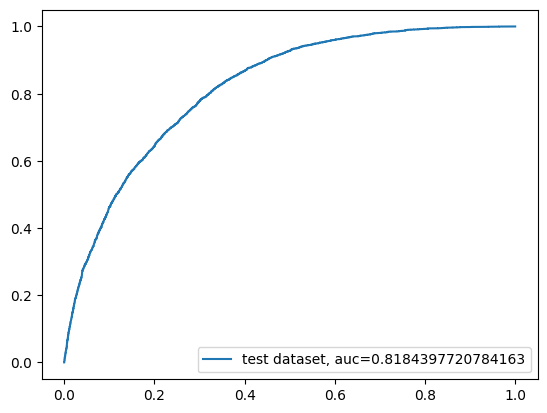

In [18]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability_real = model1.predict_proba(x_test_real)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_real, y_pred_probability_real)
auc = metrics.roc_auc_score(y_test_real, y_pred_probability_real)
plt.plot(fpr, tpr, label = "test dataset, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [22]:
#! for notebook command, without ! it is cmd prompt command
!jupyter nbconvert --to script *.ipynb

[NbConvertApp] Converting notebook Logistic Regression.ipynb to script
[NbConvertApp] Writing 3834 bytes to Logistic Regression.py
